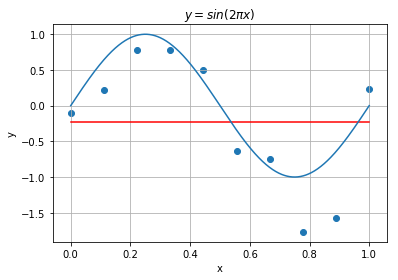

0次多项式回归：  
训练集均方根误差：0.757093
测试集均方根误差：1.041817
0.00,-0.231532566629085


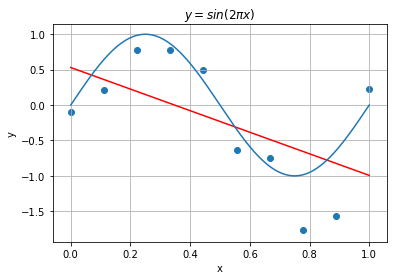

1次多项式回归：  
训练集均方根误差：0.520873
测试集均方根误差：0.958649
0.00,-1.52,0.5299227316950677


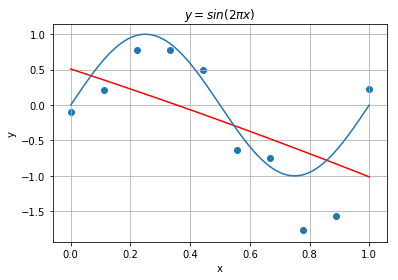

2次多项式回归：  
训练集均方根误差：0.520711
测试集均方根误差：0.976310
0.00,-1.38,-0.14,0.5089144425122694


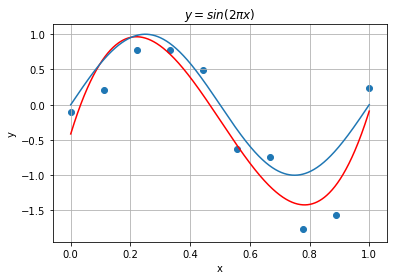

3次多项式回归：  
训练集均方根误差：0.106155
测试集均方根误差：0.282088
0.00,13.82,-40.20,26.71,-0.4142887472544116


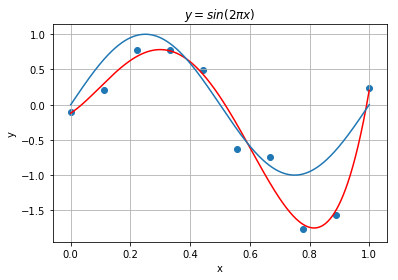

4次多项式回归：  
训练集均方根误差：0.029822
测试集均方根误差：0.295660
0.00,2.79,15.49,-62.62,44.66,-0.12022182608119575


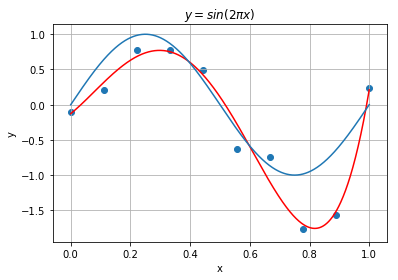

5次多项式回归：  
训练集均方根误差：0.029711
测试集均方根误差：0.296896
0.00,3.44,10.06,-47.28,27.08,7.03,-0.12736779671850623


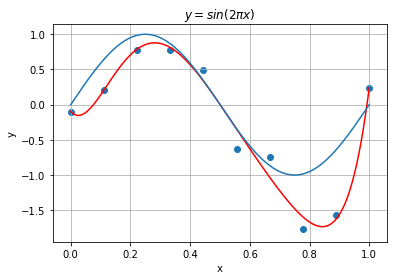

6次多项式回归：  
训练集均方根误差：0.022759
测试集均方根误差：0.277403
0.00,-4.77,111.42,-483.56,870.18,-742.92,249.98,-0.09657858315030449


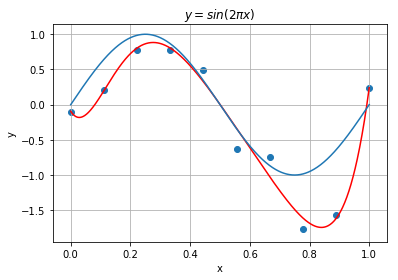

7次多项式回归：  
训练集均方根误差：0.022659
测试集均方根误差：0.283651
0.00,-6.58,141.21,-660.21,1369.68,-1471.33,778.60,-151.03,-0.0949091999553961


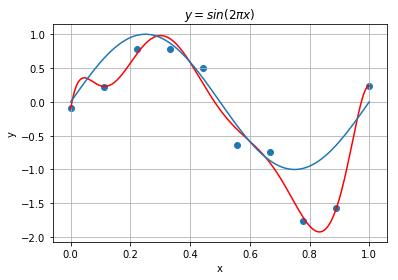

8次多项式回归：  
训练集均方根误差：0.016685
测试集均方根误差：0.395875
0.00,26.13,-518.39,4314.93,-17398.75,37602.72,-44807.80,27759.01,-6977.51,-0.09947950163723401


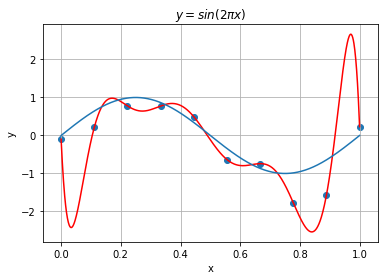

9次多项式回归：  
训练集均方根误差：0.000000
测试集均方根误差：1.386636
0.00,-167.26,3948.59,-35920.83,171623.49,-477364.06,798419.12,-790118.73,425739.31,-96159.29,-0.09762700784040174


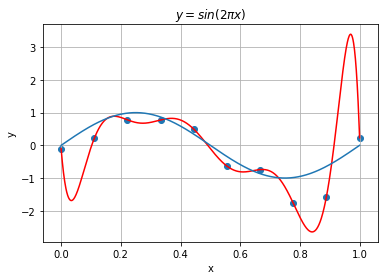

10次多项式回归：  
训练集均方根误差：0.000000
测试集均方根误差：1.730857
-0.00,-111.26,2522.87,-21262.87,90213.85,-204687.11,221874.80,-15142.13,-216384.16,202760.25,-59783.91,-0.09759660743066018


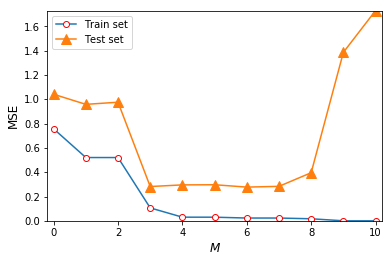

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
%matplotlib inline

np.random.seed(0)
# 训练集
a_train = np.random.random((1, 10)) - 0.5
x_train = np.linspace(0, 1, 10)
y_train = np.sin(2 * np.pi * x_train)
y_train = y_train - a_train * 2
y_train = y_train[0]

# 测试集
a_test = np.random.random((1, 5)) - 0.5
x_test = np.linspace(0.7, 1.0, 5)
y_test = np.sin(2 * np.pi * x_test)
y_test = y_test - a_test * 2
y_test = y_test[0]

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

train_mse = []
test_mse = []

# 多项式回归
n=0
for i in range(0, 11):
    quadratic_featurizer = PolynomialFeatures(degree=i)
    x_train_quadratic = quadratic_featurizer.fit_transform(x_train)
    model2 = LinearRegression()
    model2 = model2.fit(x_train_quadratic, y_train)
    
    #拟合结果
    xx = np.linspace(0, 1, 1000)
    xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
    yy_predict = model2.predict(xx_quadratic)
    plt.plot(xx, yy_predict, 'r-')
    
    plt.scatter(x_train, y_train)
    x = np.linspace(0, 1, 1000)
    y = np.sin(2 * np.pi * x)
    plt.plot(x, y)
    plt.title(r'$y=sin(2{\pi}x)$') 
    plt.xlabel('x')  
    plt.ylabel('y')  
    plt.grid(True)
#   plt.savefig('result%d.jpg' % (i), )
    plt.show()
    
    #不同阶数多项式拟合误差
    x_pred2 = quadratic_featurizer.transform(x_train.reshape(x_train.shape[0], 1))
    y_pred2 = model2.predict(x_pred2)
    model2_train_mean_sqaured_error = mean_squared_error(y_train, y_pred2)
    x_pred1 = quadratic_featurizer.transform(x_test.reshape(x_test.shape[0], 1))
    y_pred1 = model2.predict(x_pred1)
    model2_test_mean_sqaured_error = mean_squared_erro(ry_test, y_pred1)
    x_test_quadratic = quadratic_featurizer.transform(x_test)
    print('%d次多项式回归：  ' % i)
    print('训练集均方根误差：%f' % model2_train_mean_sqaured_error)
    print('测试集均方根误差：%f' % model2_test_mean_sqaured_error)
    
    n+=1
    list=model2.coef_[0]
    for n in list:
        print(format(n,'.2f'),end=",")
    print(model2.intercept_[0])

    train_mse.append(model2_train_mean_sqaured_error)
    test_mse.append(model2_test_mean_sqaured_error)
    
#不同阶数多项式拟合误差统计对比
plt.figure()
plt.plot(np.linspace(0, 10, 11), train_mse, marker='o', mec='r', mfc='w', label=u'Train set')
plt.plot(np.linspace(0, 10, 11), test_mse, marker='^', ms=10, label=u'Test set' )
plt.legend(prop = {'size':12})
plt.legend(loc="upper left") 
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"$\it {M}$",fontsize=12) 
plt.ylabel("MSE",fontsize=12) 
# plt.ylim(0, 1.41)
plt.xlim(-0.2, 10.2)
# plt.savefig("对比图.png")
plt.show()